In [234]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [235]:
from google.colab import files
upload=files.upload()

Saving crime_data.csv to crime_data (4).csv


In [236]:
df=pd.read_csv("crime_data.csv")
df.head()
df.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# EDA

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [238]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of     States  Murder  Assault  UrbanPop   Rape
0    False   False    False     False  False
1    False   False    False     False  False
2    False   False    False     False  False
3    False   False    False     False  False
4    False   False    False     False  False
5    False   False    False     False  False
6    False   False    False     False  False
7    False   False    False     False  False
8    False   False    False     False  False
9    False   False    False     False  False
10   False   False    False     False  False
11   False   False    False     False  False
12   False   False    False     False  False
13   False   False    False     False  False
14   False   False    False     False  False
15   False   False    False     False  False
16   False   False    False     False  False
17   False   False    False     False  False
18   False   False    False     False  False
19   False   False    False     False 

<Axes: >

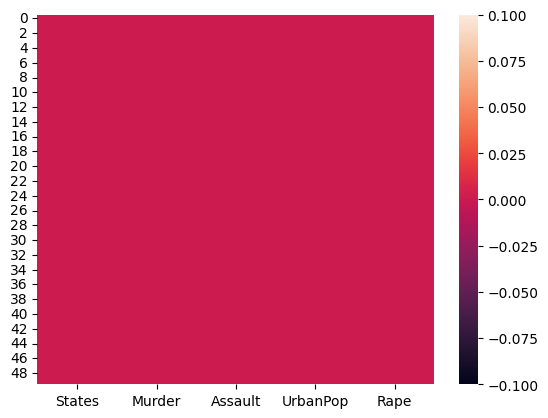

In [239]:
#to genrate heat map for missing values
cols = df.columns
sns.heatmap(df[cols].isnull())

Missing values are zero in each column can be easily seen from this heat map




In [240]:
df[df.duplicated()]
df[df.duplicated()].shape

(0, 5)

There are no duplicate values as well

In [241]:
#get descriptive stats for numerical columns
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [242]:
#Correaltion Matrix
df.corr()

<ipython-input-242-4a9c8536cd82>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


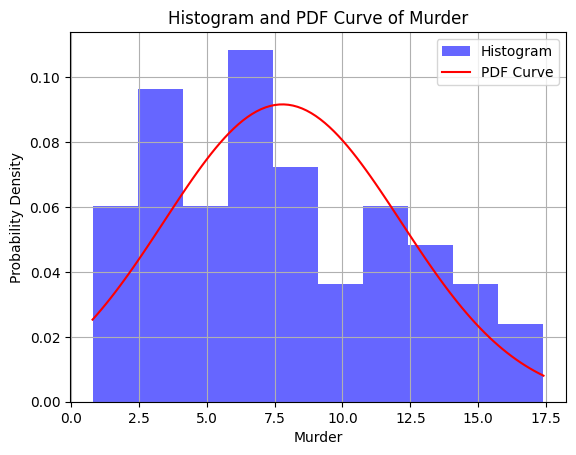

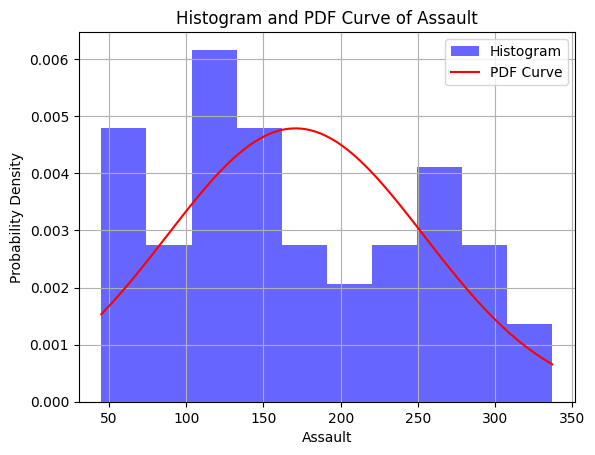

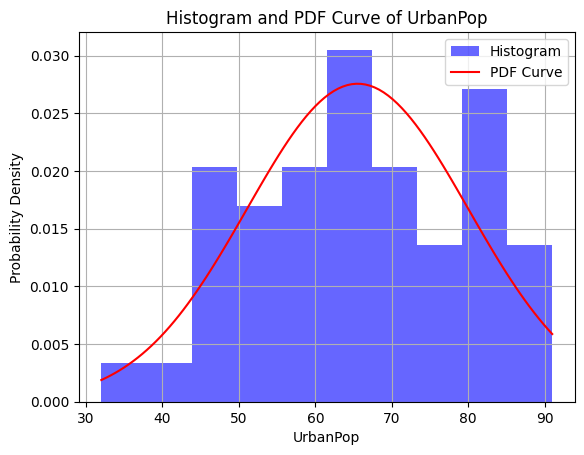

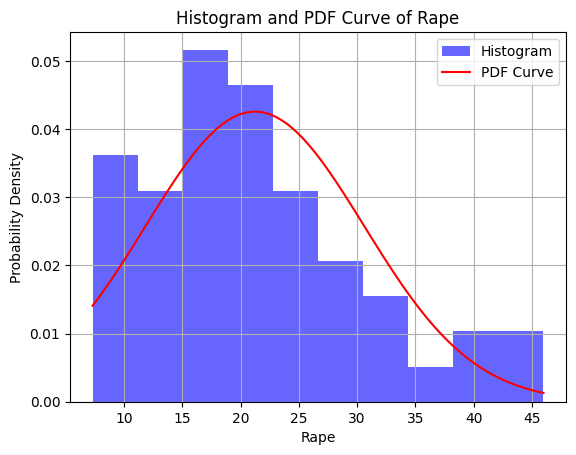

In [243]:
#Histograms
columns_to_plot = ['Murder', 'Assault', 'UrbanPop', 'Rape']

for col in columns_to_plot:
    df[col].hist(density=True, alpha=0.6, color='b', label='Histogram')

    # Compute the PDF curve
    mu, std = df[col].mean(), df[col].std()
    x = np.linspace(df[col].min(), df[col].max(), 100)
    pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)

    # Plot the PDF curve
    plt.plot(x, pdf, 'r', label='PDF Curve')

    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('Probability Density')
    plt.title(f'Histogram and PDF Curve of {col}')
    plt.legend()

    # Show the histogram with the curve
    plt.show()


In [244]:
for col in columns_to_plot:
  # Perform the Shapiro-Wilk test
  statistic, p_value = shapiro(df[col])
  alpha = 0.05  # Set your significance level (e.g., 0.05)
  if p_value > alpha:
      print(col+" column is normally distributed (fail to reject H0)")
  else:
      print(col+" column isnt normally distributed (reject H0)")

Murder column is normally distributed (fail to reject H0)
Assault column isnt normally distributed (reject H0)
UrbanPop column is normally distributed (fail to reject H0)
Rape column isnt normally distributed (reject H0)


Clustering can be performed on non-normally distributed data effectively.

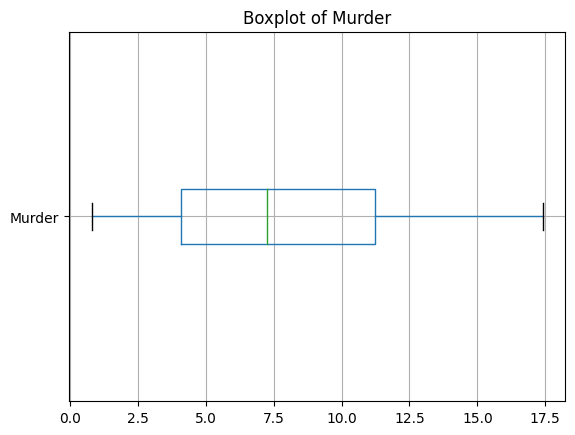

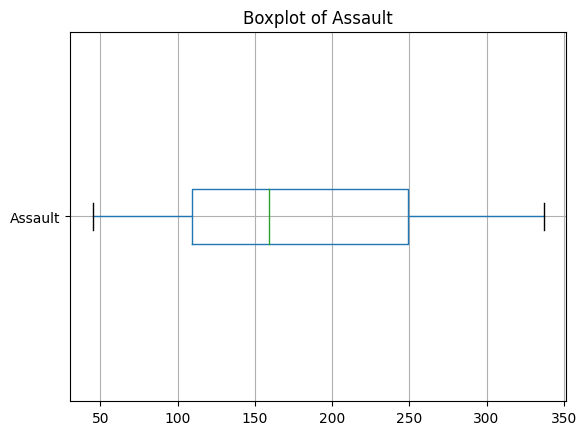

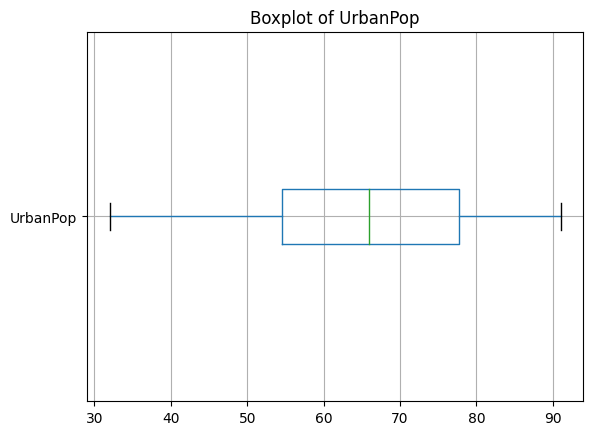

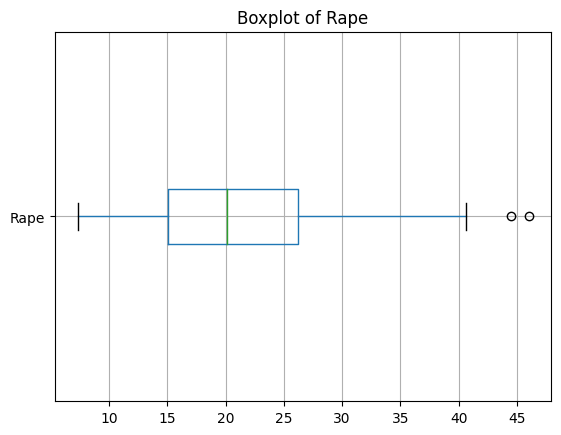

In [245]:
for col in columns_to_plot:
    df.boxplot(column=col, vert=False)
    plt.title('Boxplot of '+ col)
    plt.show()

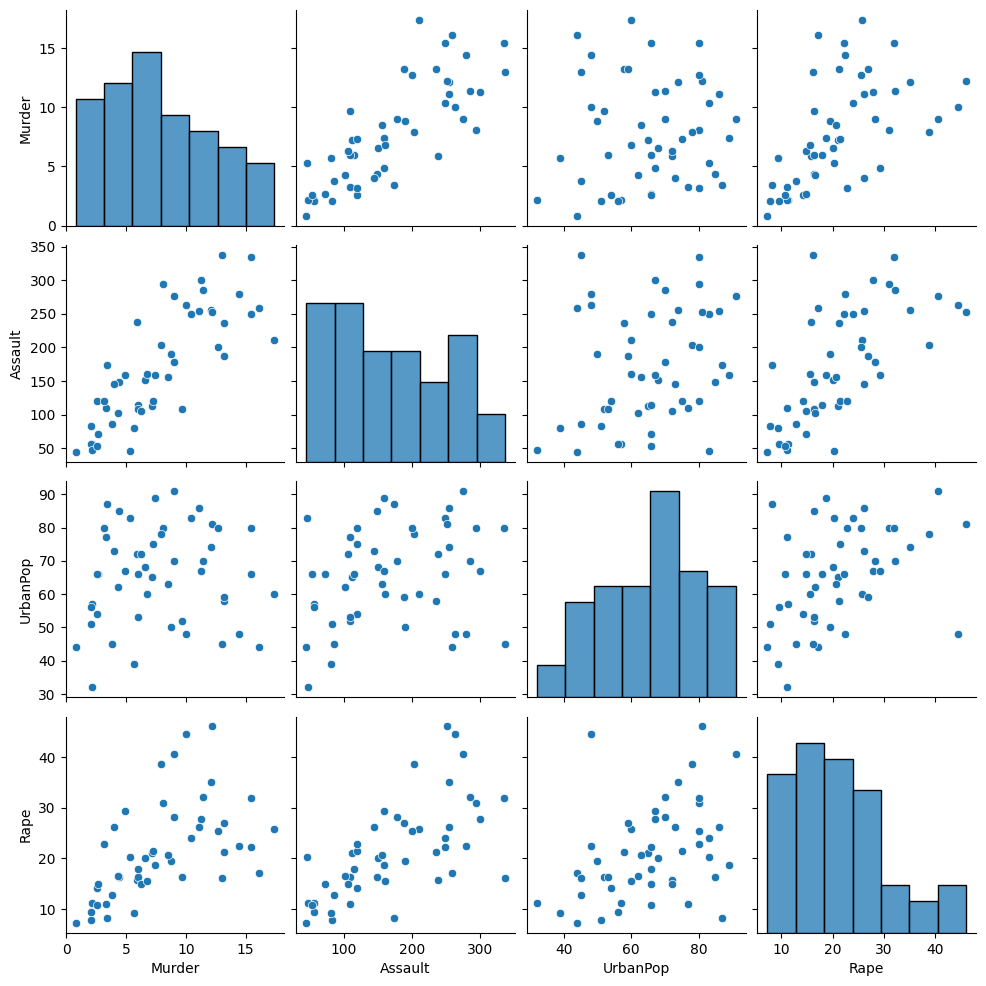

In [246]:
#pair plot
sns.pairplot(df)

# Standardisation

In [247]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df1= df.iloc[:,1:5]
SS = StandardScaler()
SS_X= SS.fit_transform(df1)
SS_X.shape

(50, 4)

In [248]:
MM = MinMaxScaler()
MM_X = MM.fit_transform(df1)
MM_X.shape

(50, 4)

 To compare the impact of different scaling methods or to prepare the data for various machine learning algorithms that have different scaling requirements.

# Hierarchal clustering

Single

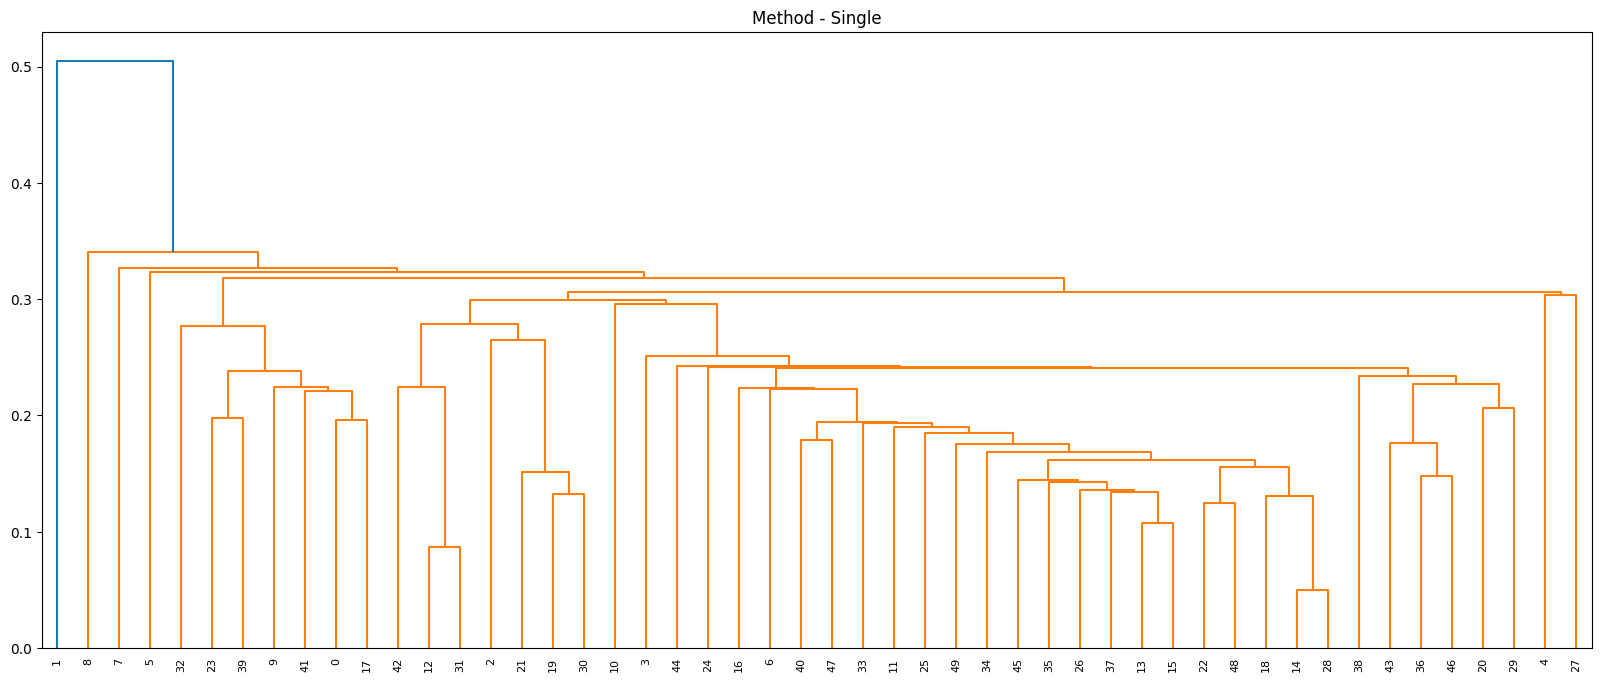

In [249]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(MM_X, method='single'))
plt.title("Method - Single")
plt.show()

In [250]:
#creating clusters method - single
HCS = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage= 'single')

In [251]:
Y_HCS = HCS.fit_predict(MM_X)
Clusters_s = pd.DataFrame(Y_HCS, columns=['Cluster'])
Clusters_s.value_counts()
#print(Clusters_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
0          49
1           1
dtype: int64

In [252]:
df['h_clusterid'] = Clusters_s
df.groupby('h_clusterid').agg(['mean']).reset_index()
#print(df)

<ipython-input-252-62254a385551>:2: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('h_clusterid').agg(['mean']).reset_index()


,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,7.742857,168.877551,65.897959,20.757143
1,1,10.000000,263.000000,48.000000,44.500000


Average

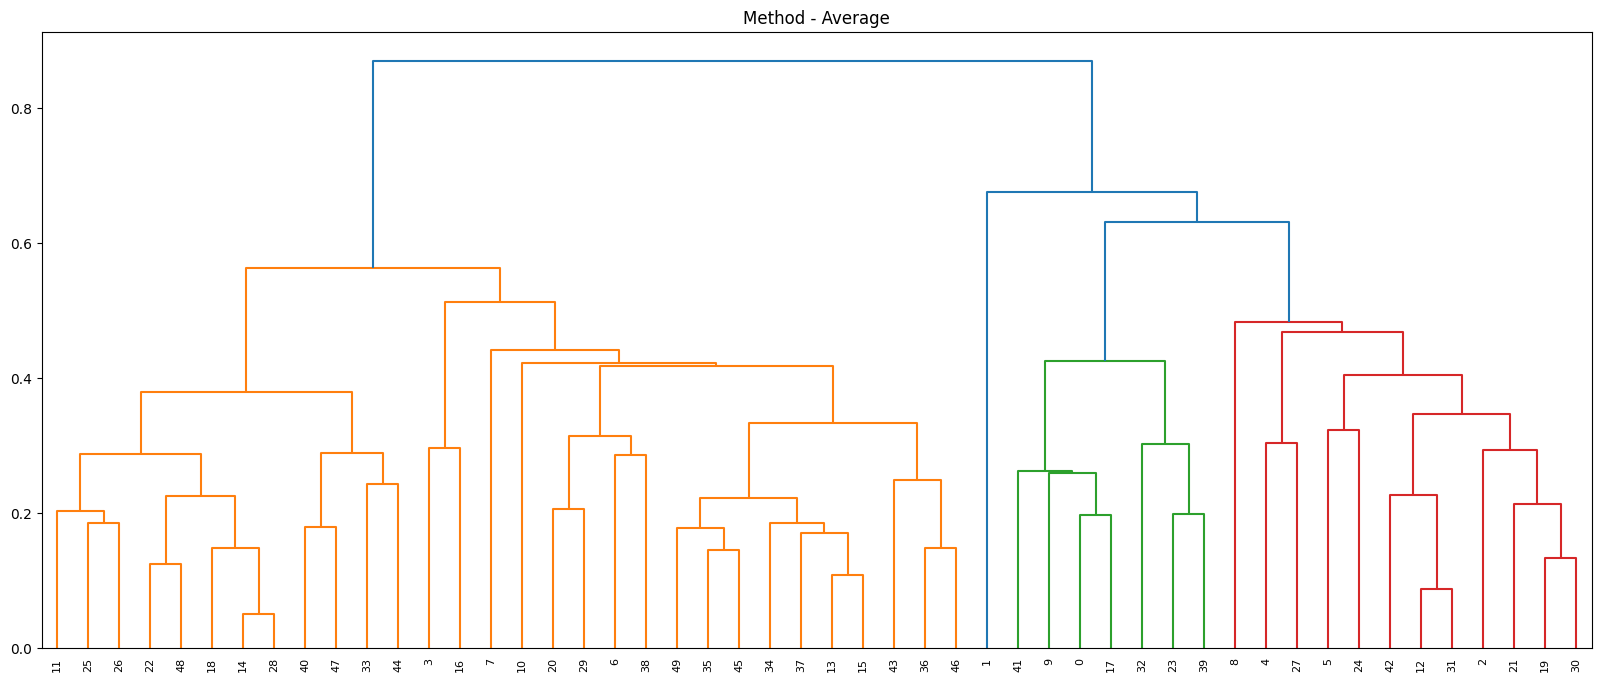

In [253]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(MM_X, method='average'))
plt.title("Method - Average")
plt.show()

In [254]:
#creating clusters method - average
HCA = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage= 'average')

In [255]:
Y_HCA = HCA.fit_predict(MM_X)
Clusters_a = pd.DataFrame(Y_HCA, columns=['Cluster'])
Clusters_a.value_counts()
#print(Clusters_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
0          30
1          12
3           7
2           1
dtype: int64

In [256]:
df['h_clusterid'] = Clusters_a
df.groupby('h_clusterid').agg(['mean']).reset_index()
#print(df)

<ipython-input-256-de8a87f9e2a7>:2: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('h_clusterid').agg(['mean']).reset_index()


,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870000,114.433333,63.633333,15.943333
1,1,10.883333,256.916667,78.333333,32.250000
2,2,10.000000,263.000000,48.000000,44.500000
3,3,14.671429,251.285714,54.285714,21.685714


Complete

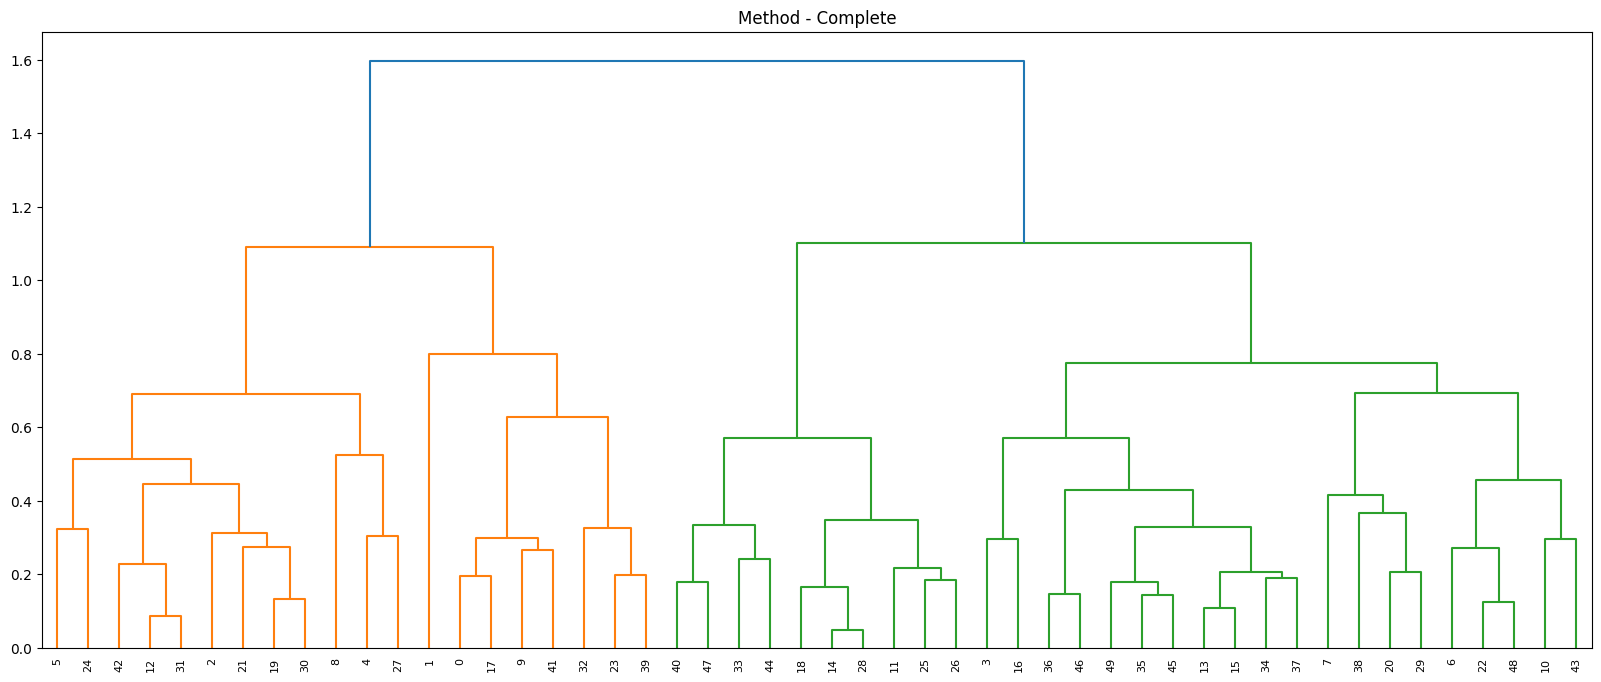

In [257]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(MM_X, method='complete'))
plt.title("Method - Complete")
plt.show()

In [258]:
#creating clusters method - average
HCC = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage= 'complete')

In [259]:
Y_HCC = HCC.fit_predict(MM_X)
Clusters_c = pd.DataFrame(Y_HCC, columns=['Cluster'])
Clusters_c.value_counts()
#print(Clusters_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
0          30
1          20
dtype: int64

Ward

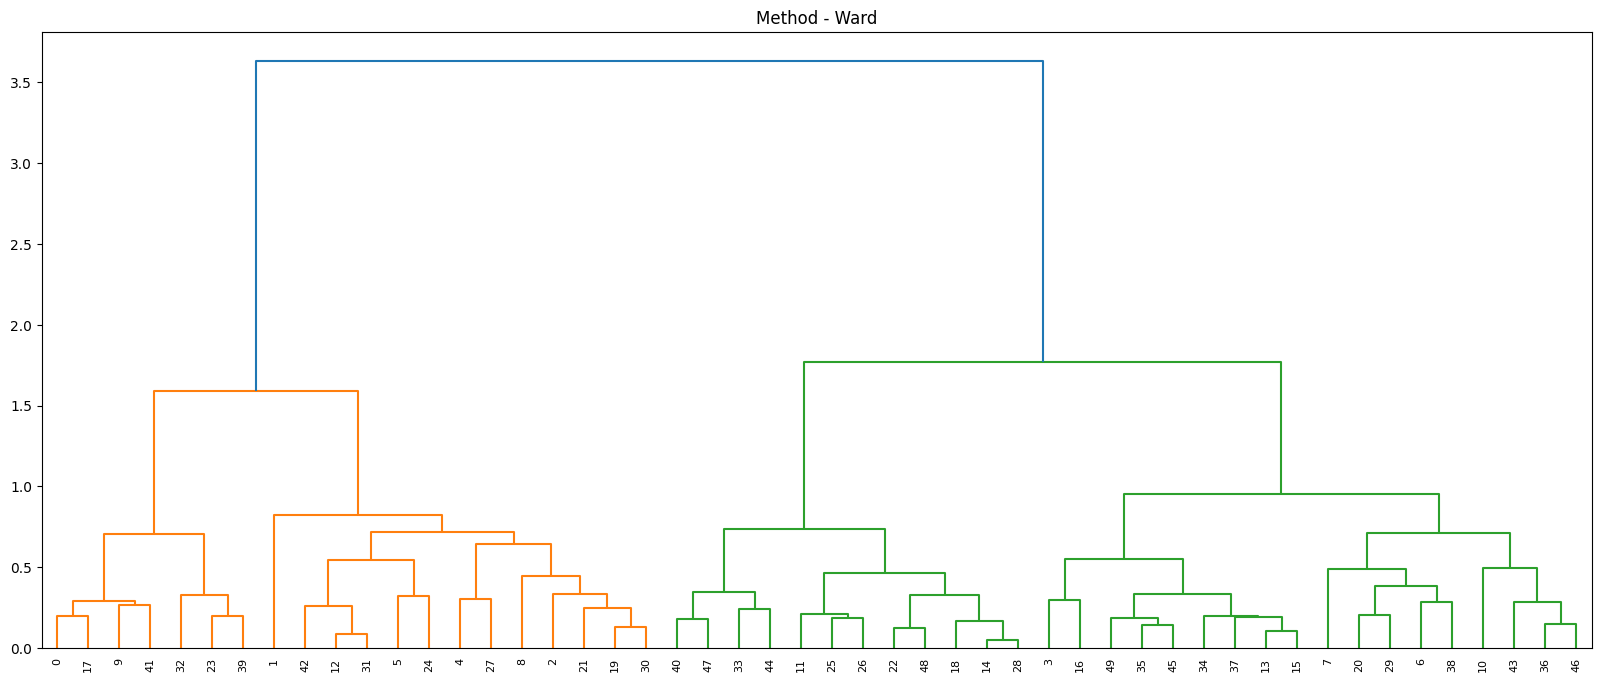

In [260]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(MM_X, method='ward'))
plt.title("Method - Ward")
plt.show()

In [261]:
#creating clusters method - average
HCW = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage= 'ward')
Y_HCW = HCW.fit_predict(MM_X)
Clusters_c = pd.DataFrame(Y_HCW, columns=['Cluster'])
Clusters_c.value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
0          30
1          20
dtype: int64

In [262]:
silhouette_HCS = silhouette_score(MM_X, Y_HCS)
silhouette_HCA = silhouette_score(MM_X, Y_HCA)
silhouette_HCC = silhouette_score(MM_X, Y_HCC)
silhouette_HCW = silhouette_score(MM_X, Y_HCW)
print(silhouette_HCS)
print(silhouette_HCA)
print(silhouette_HCC)
print(silhouette_HCW)


0.21033337025958487
0.36992391140277175
0.42364457559625074
0.42364457559625074


Till now, the Hierarchal clustering with Complete and Ward methods are better

# K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

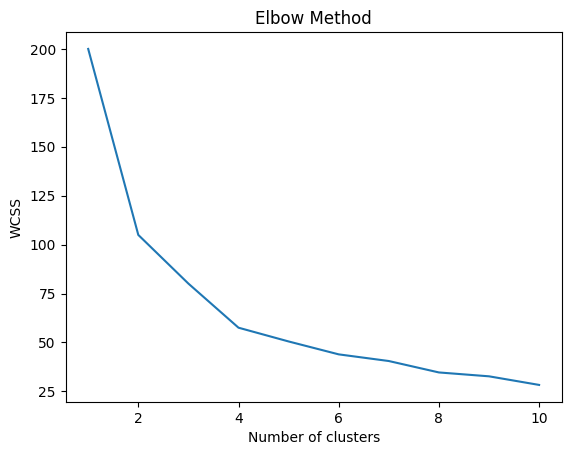

In [263]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(SS_X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [264]:
kmeans = KMeans(n_clusters=4, random_state=32)
kmeans.fit(SS_X)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [265]:
silhouette_K = silhouette_score(SS_X,labels)
print(silhouette_K)

0.33968891433344395


In [266]:
df['K_clusterid'] = kmeans.labels_
df.groupby('K_clusterid').agg(['mean']).reset_index()

<ipython-input-266-845795646093>:2: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('K_clusterid').agg(['mean']).reset_index()


,K_clusterid,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,10.815385,257.384615,76.000000,33.192308,1.076923
1,1,3.600000,78.538462,52.076923,12.176923,0.000000
2,2,13.937500,243.625000,53.750000,21.412500,2.625000
3,3,5.656250,138.875000,73.875000,18.781250,0.000000


# DBSCAN

In [287]:
dbscan = DBSCAN(eps = 1.25, min_samples=4)
dbscan.fit(SS_X)

DBSCAN(eps=1.25, min_samples=4)

In [284]:
#Noisy points are given by the label -1
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [288]:
DBS_labels = pd.DataFrame(dbscan.labels_, columns=['clusters_DBSCAN'])

In [270]:
df=pd.concat([df, DBS_labels], axis=1)
df.head()

,States,Murder,Assault,UrbanPop,Rape,h_clusterid,K_clusterid,clusters_DBSCAN
0,Alabama,13.2,236,58,21.2,3,2,0
1,Alaska,10.0,263,48,44.5,2,0,-1
2,Arizona,8.1,294,80,31.0,1,0,1
3,Arkansas,8.8,190,50,19.5,0,2,1
4,California,9.0,276,91,40.6,1,0,-1


In [271]:
df['clusters_DBSCAN'].value_counts()

 1    39
 0     7
-1     4
Name: clusters_DBSCAN, dtype: int64

In [272]:
#clusters by DBSCAN
df.groupby('clusters_DBSCAN').agg(['mean']).reset_index()

<ipython-input-272-45bae83629be>:2: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('clusters_DBSCAN').agg(['mean']).reset_index()


,clusters_DBSCAN,Murder,Assault,UrbanPop,Rape,h_clusterid,K_clusterid
,,mean,mean,mean,mean,mean,mean
0,-1,11.650000,281.500000,75.000000,40.750000,1.250000,0.000000
1,0,14.671429,251.285714,54.285714,21.685714,3.000000,2.000000
2,1,6.156410,144.948718,66.589744,19.148718,0.230769,1.615385


In [289]:
silhouette_D = silhouette_score(SS_X,DBS_labels)
print(silhouette_D)

0.25499695350718327


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Therefore, the best grouping is done by Hierarchial clustering by complete and ward methods with each scoring 0.4236